# CS236 Project
This fork uses DDRM to remove raindrops from images. This is motivated by exploring whether diffusion models and techniques are applicable for removing adverse weather effects from camera systems for autonomous driving use cases. Ultimately, vanilla DDRM, which relies on pretrained models is ineffective for doing this for three reasons 1) ineffect rain removal, 2) too slow, 3) poor reconstruction quality for out of distribution driving scenes. Swapping the pretrained model for a fine tuned LSUN bedroom model trained on 1000 clean images from the RainDrop data set (https://github.com/rui1996/DeRaindrop) did not improve either of the three problems mentioned.

## Arguments for DDRM's main.py  
These are used to run DDRM's main.py file. They can be copy/pasted into VS code's launch.json and changed as required. 
Choose only one of LSUN bedroom or Imagenet. 

In [ ]:
// LSUN BEDROOM
"--ni",
"--config", // required
"bedroom.yml",
"--doc", // required. Name of log folder. Log folder is where the model chkpt resides / downloaded to if empty
"bedroom",
"--timesteps",  // DDRM sampling timesteps
"20",
"--deg", 
"deno", 
"--sigma_0", 
"0.05",
"--exp", // name of the experiment folder
"exp2", 
"--no_degrade" // Override vanilla DDRM's creation of y0, which would've added extra noise to a clean image for subsequent reversal

// ImageNet
"--ni",
"--config",
"imagenet_256.yml",
"--doc",
"imagenet_ood",
"--timesteps",
"20",
"--eta",
"0.85",
"--etaB",
"1",
"--deg",
"deno",
"--sigma_0",
"0.05",
"-i",
"imagenet_sr4_sigma_0.0",
"--exp",
"exp10",
"--no_degrade"

# Using Fine Tuned Checkpoints
The ckpt variable in runners/diffusion.py was modified to point to the fine tuned checkpoints. Uncomment/comment out as required. 
The code for fine tuning is not stored in this DDRM fork. Fine tuning required using the Pytorch implementation of DDPM (https://github.com/pesser/pytorch_diffusion/tree/master/pytorch_diffusion) and OpenAI's training scheme in its Guided Diffusion repository (https://github.com/openai/guided-diffusion/blob/main/scripts/image_train.py), plus DDRM's model parameters for its LSUN Bedroom pretrained model in configs/bedroom.yml.

# Plotting DDDRM Results
The below code snippet was used to create a single .png file of 20 before and after DDRM outputs.

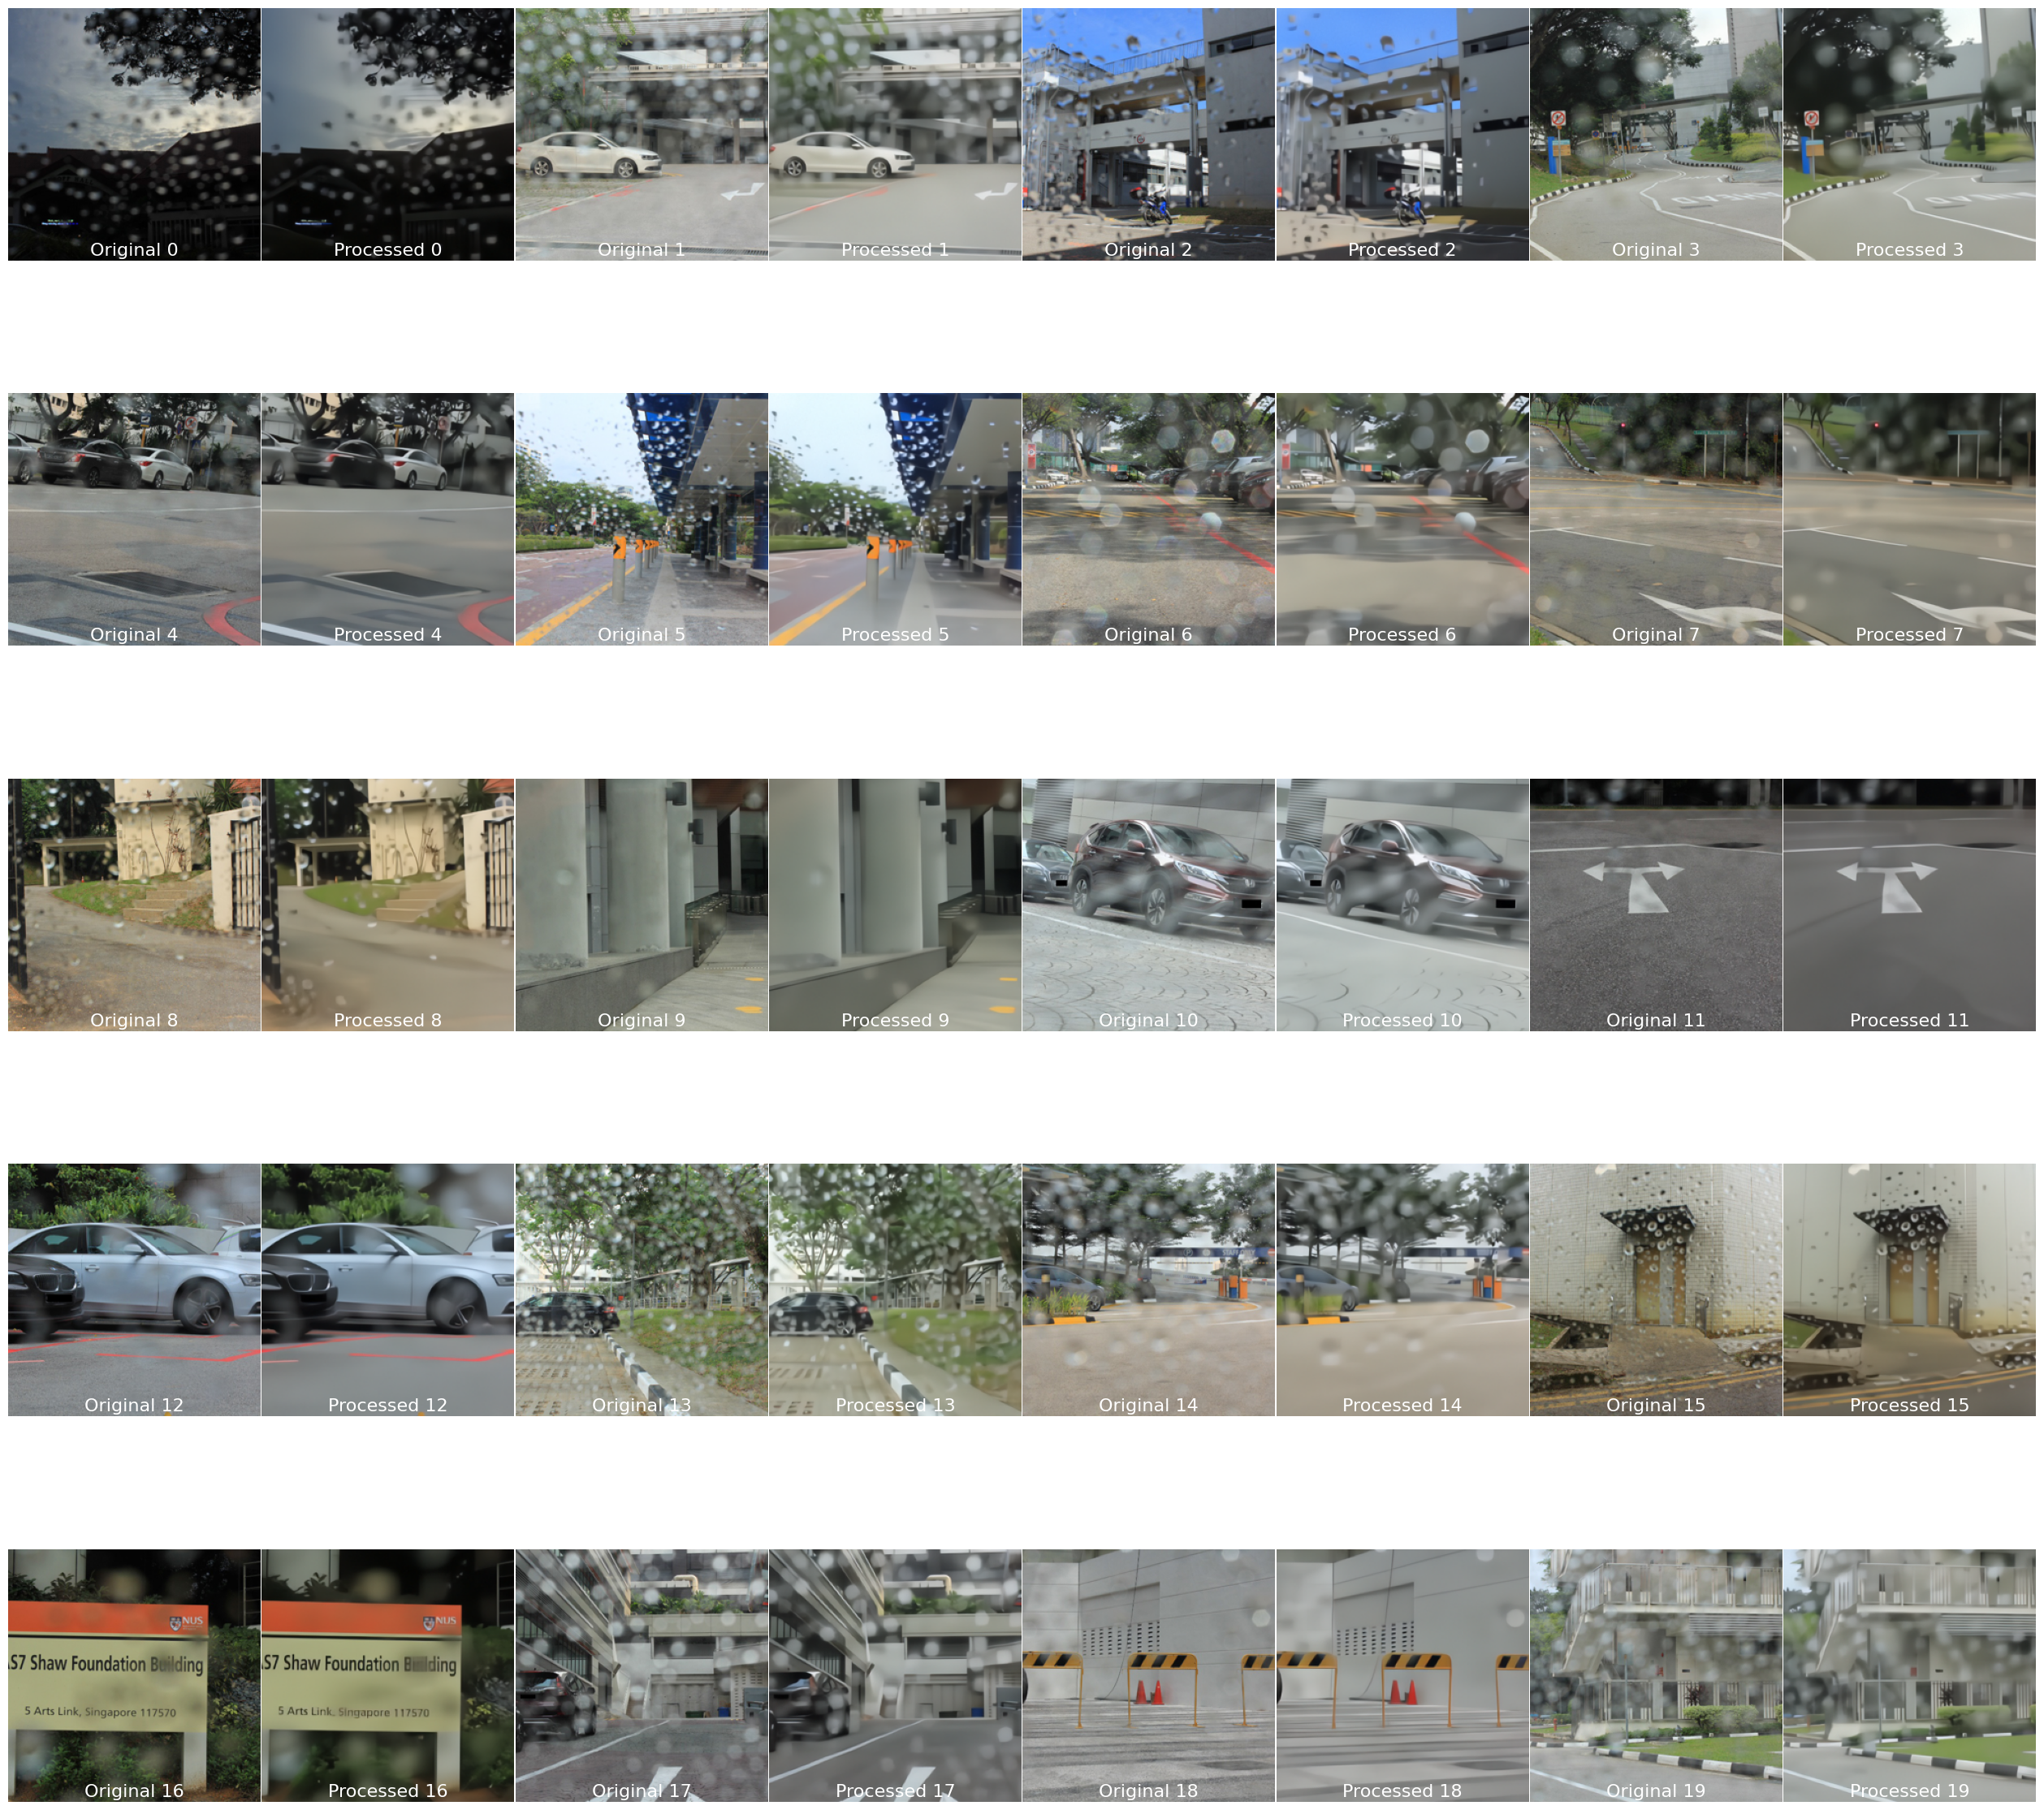

In [2]:
from plotting import plotting_helper
#plot_20_imaages(directory_path, output_path, output_filename)
# plotting_helper.plot_20_images('exp11/image_samples/imagenet_sr4_sigma_0.0', 'results/', 'ImageNet_deno_sig0.05_ts20_PSNR33.92_time95s.png') # GCP
# plotting_helper.plot_20_images('exp4/image_samples/images', 'results/', 'LSUN_deno_sig0.05_ts20_PSNR33.41_time50s.png') # GCP
# plotting_helper.plot_20_images('exp2-2416000/image_samples/images', 'results/', 'finetuned2416000_LSUN_deno_sig0.05_ts20_PSNR30.15_time27.png') # AWS
# plotting_helper.plot_20_images('exp3-2400000/image_samples/images', 'results/', 'finetuned2400000_LSUN_deno_sig0.05_ts20_PSNR30.34_time27.png') # AWS
# plotting_helper.plot_20_images('exp3-2416000/image_samples/images', 'results/', 'finetuned2416000_LSUN_deno_sig0.25_ts50_PSNR28.45_time57.png') # AWS
plotting_helper.plot_20_images('exp3-2416000/image_samples/images', 'results/', 'finetuned2416000_LSUN_deno_sig0.10_ts50_PSNR32.6_time49.png') # AWS

